In [1]:
from functions_py import *
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy.ma as ma
import pandas as pd 
import skimage as sk
import scipy.ndimage as nd
from array import array
from functions_MuonsNSAMP1 import *
import time

from ROOT import TProfile, TGraphErrors, TH2F, TLegend
import ROOT

def gaussian(x, a, mean, sigma):
    return a * np.exp(-((x - mean)**2 / (2 * sigma**2)))

# def Gaussian2(x,m1,s1,g1,a1, m2, s2, g2, a2): #data, mean, sigma, gain, height1, heigth2
#     return a1*np.exp(-1/2*((x-m1-g1)/s1)**2) + a2*np.exp(-1/2*((x-m2-g2)/s2)**2)

def Gaussian2(x,m,s,g,a1,a2): #data, mean, sigma, gain, height1, heigth2
    return a1*np.exp(-1/2*((x-m)/s)**2)+a2*np.exp(-1/2*((x-m-g)/s)**2)


def EnergySpectrum(x, N):
    return N * np.sin(x)*np.cos(x)**3

Colormap = 'jet'

# print(time.time())
# print(time.gmtime(0))

In [2]:
plt.rcParams.update({
    "image.origin": "lower",
    "image.aspect": 1,
    #"text.usetex": True,
    "grid.alpha": .5,
    "axes.linewidth": 3,
    "lines.linewidth" : 1,
    "font.size":    15.0,
    "xaxis.labellocation": 'right',  # alignment of the xaxis label: {left, right, center}
    "yaxis.labellocation": 'top',  # alignment of the yaxis label: {bottom, top, center}
    "xtick.top":           True ,  # draw ticks on the top side
    "xtick.major.size":    8    ,# major tick size in points
    "xtick.minor.size":    4      ,# minor tick size in points
    "xtick.direction":     'in',
    "xtick.minor.visible": True,
    "ytick.right":           True ,  # draw ticks on the top side
    "ytick.major.size":    8    ,# major tick size in points
    "ytick.minor.size":    4      ,# minor tick size in points
    "ytick.direction":     'in',
    "ytick.minor.visible": True,
    "ytick.major.width":   2   , # major tick width in points
    "ytick.minor.width":   1 ,
    "xtick.major.width":   2   , # major tick width in points
    "xtick.minor.width":   1 ,
    "legend.framealpha": 0 ,
    "legend.loc": 'best',

})

Colormap = 'jet'
Norm = mpl.colors.LogNorm(vmin=10**-1, vmax=7 * 10**0)

Filename: ../images/Pruebas_Mau/Fe55_NSMAP200//proc_skp_m-009_microchip_T_150__Vv82_NSAMP_200_NROW_300_NCOL_700_EXPOSURE_20_NBINROW_1_NBINCOL_1_img_112.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     165   (700, 300)   float32   
  1                1 ImageHDU       164   (700, 300)   float32   
  2                1 ImageHDU       164   (700, 300)   float32   
  3                1 ImageHDU       164   (700, 300)   float32   


None
----------------


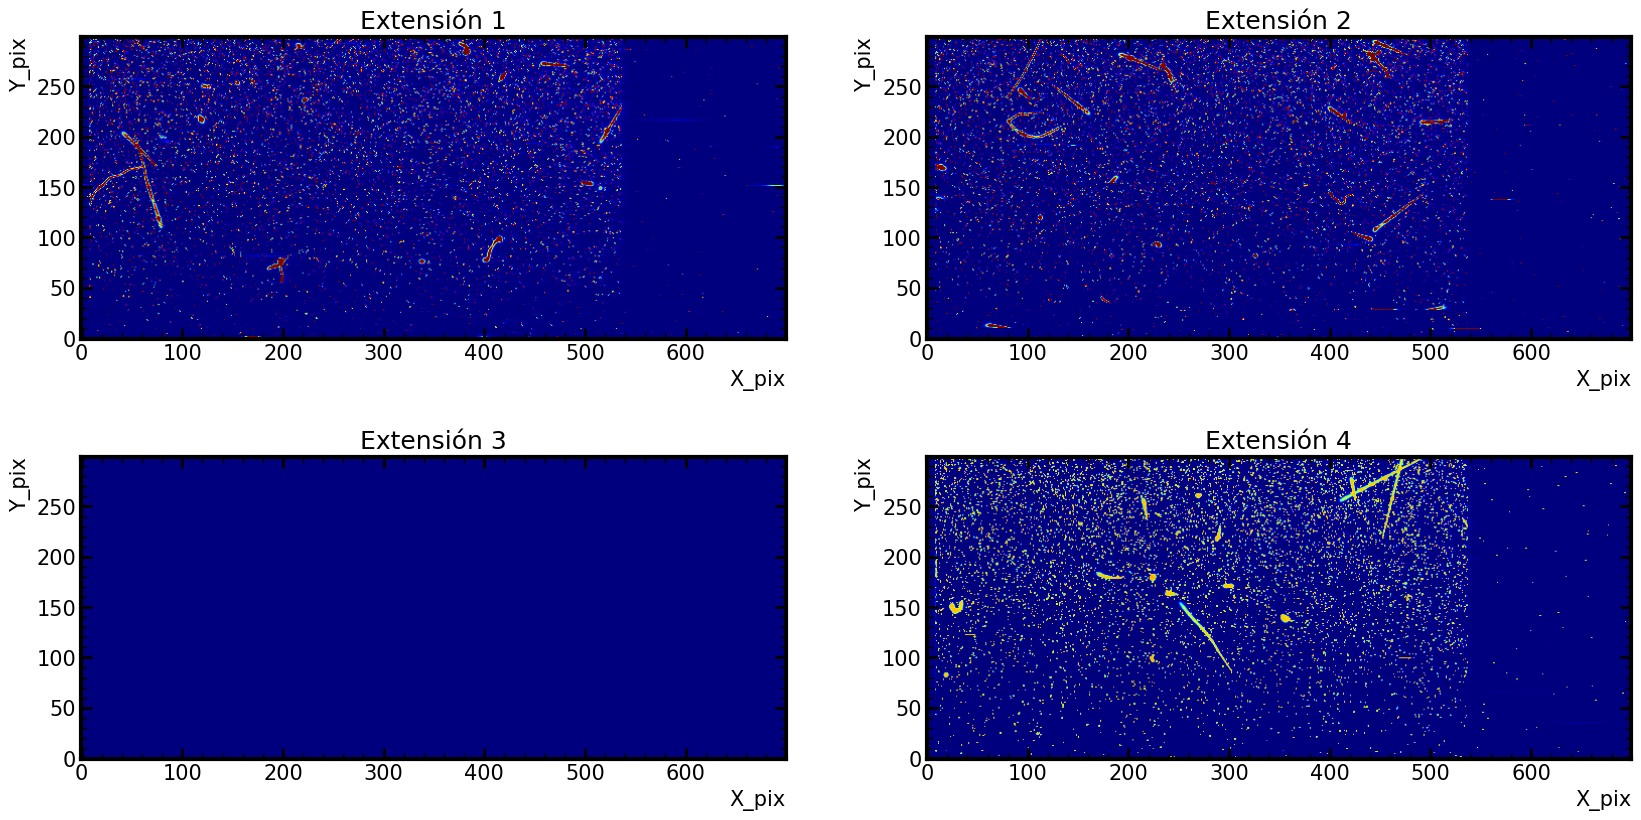

In [3]:
# path = '../images/ENE2025/proc_skp_m-009_microchip_T_170__Vv82_NSAMP_324_NROW_400_NCOL_700_EXPOSURE_0_NBINROW_1_NBINCOL_1_img_106.fits'
# path = '../images/Pruebas_Mau/Fe55_NSMAP200/proc_skp_m-009_microchip_T_150__Vv82_NSAMP_200_NROW_250_NCOL_700_EXPOSURE_20_NBINROW_1_NBINCOL_1_img_62.fits'
path = '../images/Pruebas_Mau/Fe55_NSMAP200//proc_skp_m-009_microchip_T_150__Vv82_NSAMP_200_NROW_300_NCOL_700_EXPOSURE_20_NBINROW_1_NBINCOL_1_img_112.fits'

hdu_list = fits.open(path)
print(hdu_list.info())
print('----------------')
# hdu_list[0].header
plt.figure(figsize=(20,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(hdu_list[i].data-np.median(hdu_list[i].data),vmin = 10, vmax = 100000, cmap = Colormap)
    # plt.imshow(hdu_list[i].data-np.median(hdu_list[i].data),vmin=100,vmax=1000, cmap = 'gray')
    plt.title('Extensión '+str(i+1))
    plt.ylabel('Y_pix')
    plt.xlabel('X_pix')
plt.show()



# Sustrayendo el promedio por renglón

In [4]:
extension = 2

## Sustrayendo la media del renglon

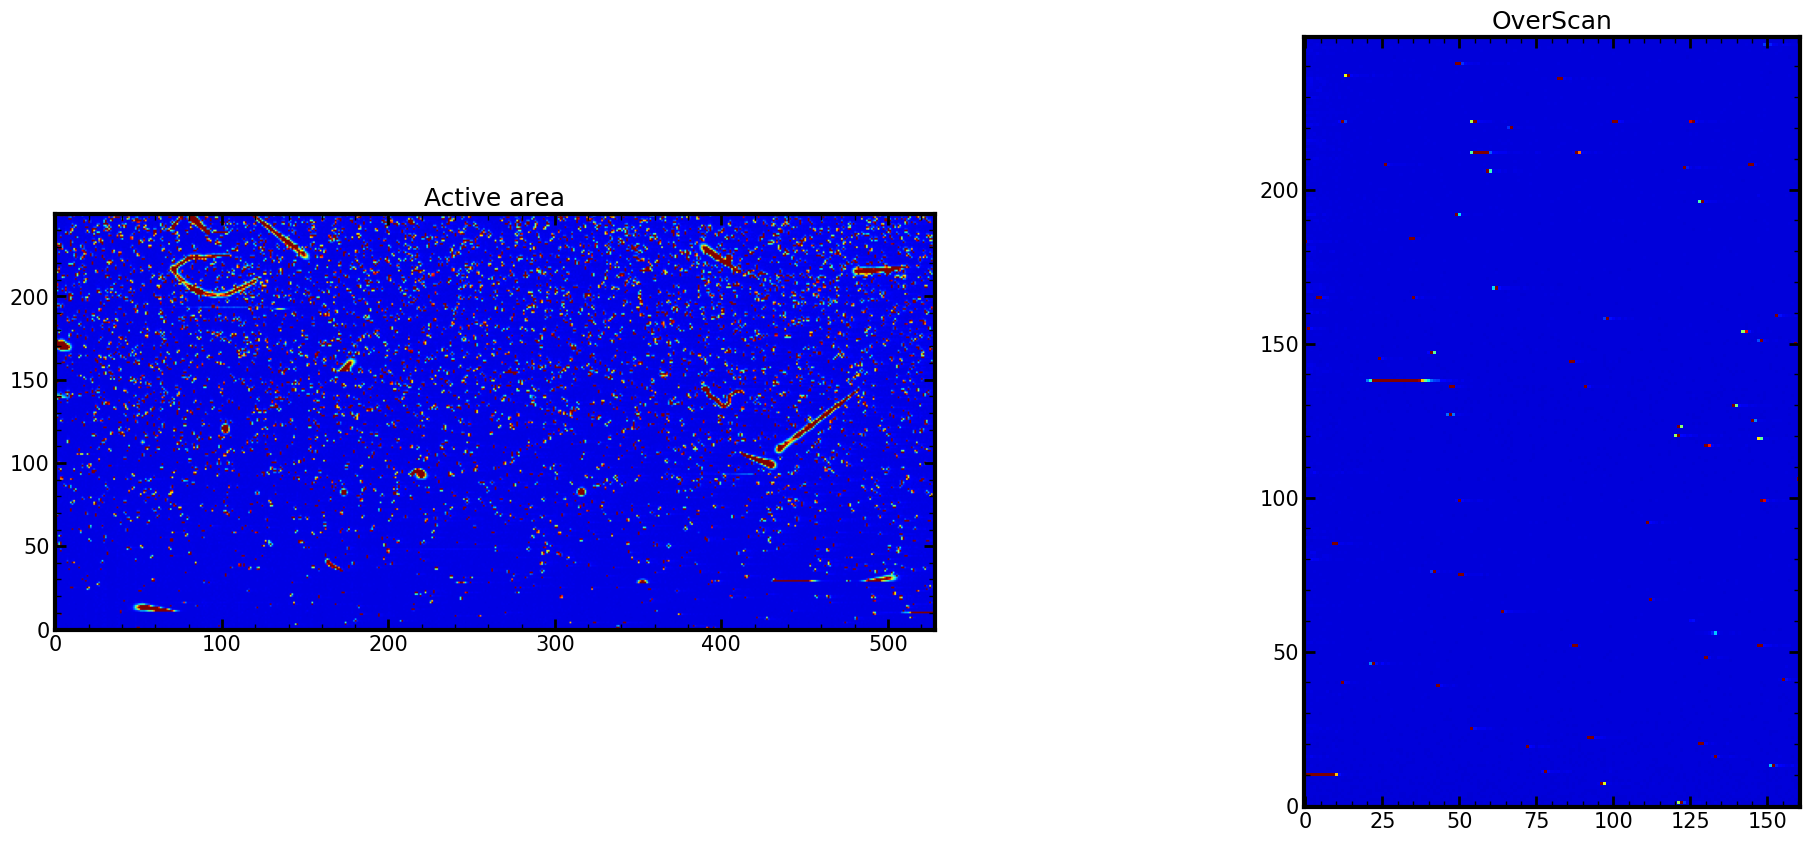

In [5]:
### Muestra el area activa y overscan de la extensión 
# plt.imshow(hdu_list[0].data[:, 550:], vmin = 0, vmax = 80000, origin = 'lower')
# Overscan = hdu_list[extension - 1].data[:300, 539:]
# active_area = hdu_list[extension - 1].data[:300, 10:539]

# Overscan = hdu_list[extension - 1].data[:250, 539:]
# active_area = hdu_list[extension - 1].data[:250, 10:539]

# Overscan = hdu_list[extension - 1].data[:, 539:]
# active_area = hdu_list[extension - 1].data[:, 10:539]

Overscan = hdu_list[extension - 1].data[:250, 539:]
active_area = hdu_list[extension - 1].data[:250, 10:539]


fig, axs = plt.subplots(1,2, figsize=[25,10])
# oScan_mask=sk.measure.label(Overscan>=np.max(Overscan) , connectivity=2)
# oScan=ma.masked_array(Overscan,mask=(oScan_mask>0))
axs[0].imshow(active_area, origin='lower', vmin = 100, vmax = 100000, cmap = Colormap)
axs[0].set_title('Active area')

axs[1].imshow(Overscan, origin='lower', vmin = 1000, vmax = 100000, cmap = Colormap)
axs[1].set_title('OverScan')

# plt.colorbar()
plt.show()

# fig, axs = plt.subplots(figsize=[10,10])
# active_area_mask=sk.measure.label(active_area>=np.max(active_area), connectivity=2)
# active_area_true=ma.masked_array(active_area,mask=(active_area_mask>0))
# plt.colorbar(location = 'bottom')
# plt.colorbar()

# fig.colorbar(x1, ax=axs[0])
# fig.colorbar(x2, ax=axs[1])


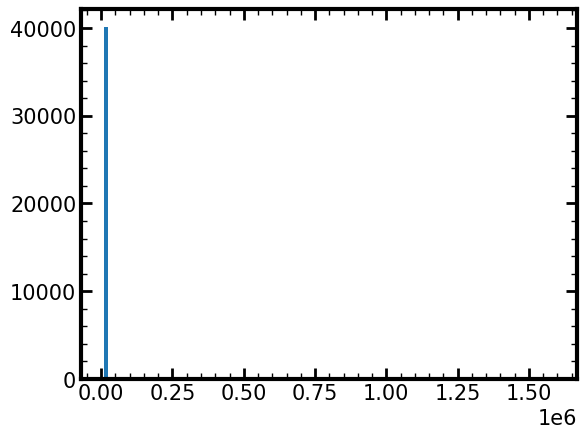

In [6]:
plt.hist(Overscan.flatten(), bins = 100)
# plt.yscale('log')
plt.show()

In [7]:
### Dimensiones de Overscan
print('Dimensiones Oscan: ', Overscan.shape)
oscan_x = Overscan.shape[1]
oscan_y = Overscan.shape[0]


### Dimensiones de Active Area
print('Dimensiones ActA: ', active_area.shape)
acta_x = active_area.shape[1]
acta_y = active_area.shape[0]

Dimensiones Oscan:  (250, 161)
Dimensiones ActA:  (250, 529)


In [8]:
### Se sustrae la mediana de cada renglón y se crea un arreglo
medi_rows_value = []
for element in np.arange(0, oscan_y):
    row = Overscan[element: element +1, 0: oscan_x]
    num_row = element + 1
    # plt.imshow(row, origin='lower')
    # plt.show()
    # print(row.shape)
    # print(type(row))
    # print(row.sum()/row.shape[1])
    medi_value = np.median(row)
    medi_rows_value.append([medi_value])
    # print((num_row, mean_value))

print(medi_rows_value[0])

[np.float32(8739.115)]


In [9]:
### Se le resta el valor de promedio de cada renglón a su respectivo renglon del area activa
true_active_area = active_area - medi_rows_value
print(active_area[1][1])
print(true_active_area[1][1])
### Se le resta el valor de promedio de cada renglón a su respectivo renglon del oScan
# true_Oscan = Overscan - mean_rows_value


true_Oscan = Overscan
min_oScan = np.min(true_Oscan)
# plt.imshow(true_active_area, origin='lower')

9296.965
543.9551


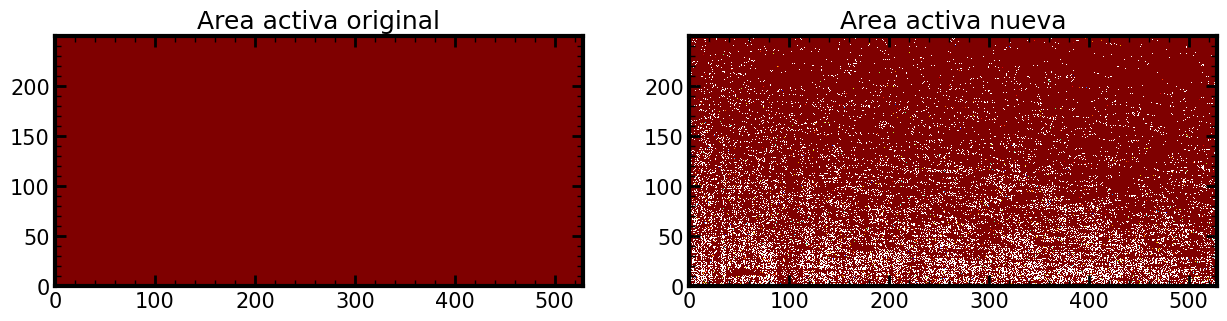

In [10]:
## Se muestra la comparación de la extensión original y despues de quitarle la mediana

Figsize = [15,15]
fig, axs = plt.subplots(1, 2, figsize=Figsize)
# oScan_mask=sk.measure.label(Overscan>=np.max(Overscan) , connectivity=2)
# oScan=ma.masked_array(Overscan,mask=(oScan_mask>0))
Vmin = 10
Vmax = 30000
axs[0].set_title('Area activa original')
axs[1].set_title('Area activa nueva')
x0 = axs[0].imshow(active_area, origin='lower', cmap = Colormap,  norm=Norm)
x1 = axs[1].imshow(true_active_area, origin='lower', cmap = Colormap, norm=Norm)
# plt.colorbar()

# fig.colorbar(x0, ax=axs[0]) 
# fig.colorbar(x1, ax=axs[1])

# print(active_area.max())
# print(true_active_area.max())
plt.show()

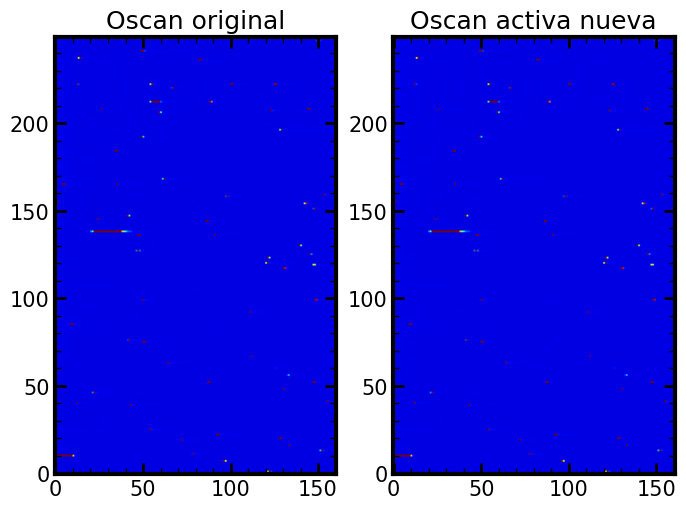

In [11]:
fig, axs = plt.subplots(1, 2, figsize=[8,8])
# oScan_mask=sk.measure.label(Overscan>=np.max(Overscan) , connectivity=2)
# oScan=ma.masked_array(Overscan,mask=(oScan_mask>0))
Vmin = 10
Vmax = 100000
axs[0].set_title('Oscan original')
axs[1].set_title('Oscan activa nueva')
x0 = axs[0].imshow(Overscan, origin='lower', vmin=Vmin, vmax = Vmax, cmap = Colormap)
x1 = axs[1].imshow(true_Oscan, origin='lower', vmin=Vmin, vmax = Vmax, cmap = Colormap)
# plt.colorbar()

# fig.colorbar(x0, ax=axs[0]) 
# fig.colorbar(x1, ax=axs[1])

# print(active_area.max())
# print(true_active_area.max())
plt.show()

/tmp/ipykernel_5155/3391049149.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


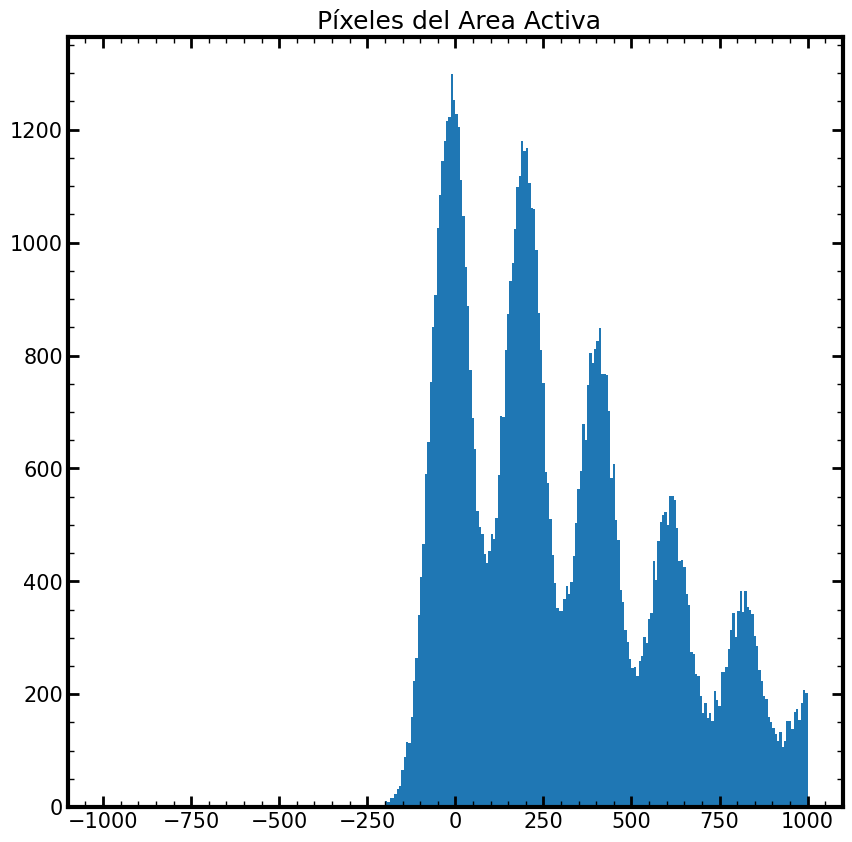

In [12]:
fig_all, axs_all = plt.subplots(1, 1, figsize=(10, 10))

# print(true_Oscan)
min_oScan = np.min(true_Oscan)

# act = true_active_area - offset
## Generamos el histograma de los pixeles del oScan especificando el rango
axs_all.hist(true_active_area.flatten(), bins= 300, range = (-1000, 1000))# , label="Pixeles del Overscan")
# axs_all.hist(active_area.flatten(), bins= 300, range = (-1000, 1000))# , label="Pixeles del Overscan")
# axs_all.hist(true_Oscan.flatten(), bins= 200, range = (8000, 9500))# , label="Pixeles del Overscan")


# axs_all.vlines(14651.275, ymin=0, ymax=900, colors='k', linestyle = 'dashed', label = 'Offset')
# axs_all.vlines(14720.0, ymin=0, ymax=2000, colors='r')

axs_all.set_title(' Píxeles del Area Activa')
plt.legend()

plt.show()

In [13]:
h2=TH1F("histogram", r"Distribucion del Area Activa", 100, -250, 1200)
# h3.AddDirectory(False)
for pixel_value in true_active_area.flatten():
    # if not np.ma.is_masked(pixel_value):
    h2.Fill(pixel_value)
    #print(pixel_value)

c1=TCanvas()
c1.SetLogy()
c1.SetGrid()
h2.SetStats(0)
h2.GetXaxis().SetTitle("Energia (ADUs)")
h2.Draw()
c1.Draw()

## Aplanando el Oscan

### Doble Gaussiana

In [14]:
# min_oScan = np.min(true_Oscan)
# extension = 4
Bins = 900
Bins_fit = Bins
# Range_fit = [-100, 400]

Range_fit = [-65, 300]
ratio_keV = 0.0036  ## KeV/e-

# data = hdu_list[extension-1].data[:, :550]
data = true_active_area
header = hdu_list[extension-1].header
# oScan=hdu_list[extension-1].data[:,550:]

hist , bins_edges = np.histogram(true_Oscan.flatten(), bins = Bins,  range=(min_oScan, 18000))
offset = bins_edges[np.argmax(hist)]
print('Offset Value: ', offset, ' ADUs')
Overscan_plane = true_Oscan - offset 
fgaus2 = TF1("fgaus2","[3]*exp(-0.5*((x-[0])/[1])^2)+[4]*exp(-0.5*((x-[0]-[2])/[1])^2)", Range_fit[0], Range_fit[1],5) # TF1("nombre", "funcion escrita como en root", min, max, #parametros)

h3=TH1F("histogram", r"Distribucion del Overscan",Bins_fit, -200, 400)
# h3.AddDirectory(False)
for pixel_value in Overscan_plane.flatten():
    # if not np.ma.is_masked(pixel_value):
    h3.Fill(pixel_value)
    #print(pixel_value)

fgaus2.SetParameters(0,40,210, 400, 50) # Establecer parametros iniciales del fit, de manera visual es posible determinarlos como una primera aproximacion
# fgaus2.SetParameters(3.999255762274112,62.819921446387646, 197.8901791750652, 106.11699858208667, 4.973093664397046)

h3.Fit(fgaus2, "R")


c1=TCanvas()
c1.SetLogy()
c1.SetGrid()
h3.SetStats(0)
h3.GetXaxis().SetTitle("Energ#acute{i}a (ADUs)")
h3.Draw()
fgaus2.GetXaxis().SetRangeUser(-100,10000)
fgaus2.Draw("same")
c1.Draw()

leg = TLegend(0.5, 0.7, 0.9, 0.9)
leg.AddEntry(h3, "Datos", "L")
leg.AddEntry(fgaus2, "Ajuste de doble gaussiana", "L")
leg.Draw()

gStyle.SetOptFit(1100)

# # fgaus2.Draw('Quiet')
print('Parameters of the Doble-Gaussian Fit')
print('Mean: ', fgaus2.GetParameters()[0],  ' +- ', fgaus2.GetParError(0))
print('Sigma: ', fgaus2.GetParameters()[1],  ' +- ', fgaus2.GetParError(1))
print('Gain: ', fgaus2.GetParameters()[2],  ' +- ', fgaus2.GetParError(2))
print('First Peak: ', fgaus2.GetParameters()[3],  ' +- ', fgaus2.GetParError(3))
print('Second Peak: ', fgaus2.GetParameters()[4],  ' +- ', fgaus2.GetParError(4), '\n')
print("chiSquare: " + str(fgaus2.GetChisquare()))
print("NDegrees of Freedom: " + str(fgaus2.GetNDF()))
# print("chiSquare / NDF :", fgaus2.GetChisquare() / fgaus2.GetNDF())
print("Prob:", fgaus2.GetProb(), '\n')


Offset Value:  8849.841  ADUs
Parameters of the Doble-Gaussian Fit
Mean:  -4.208075583118171  +-  0.8440655411775139
Sigma:  67.69210024900205  +-  0.7413299923855199
Gain:  216.18711212362012  +-  2.8334041287771248
First Peak:  135.30715588547858  +-  1.0186643599322966
Second Peak:  14.447341610365543  +-  0.3883315221776723 

chiSquare: 613.3870425265917
NDegrees of Freedom: 542
Prob: 0.01787428523563087 

****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      613.387
NDf                       =          542
Edm                       =  3.26704e-07
NCalls                    =          209
p0                        =     -4.20808   +/-   0.844066    
p1                        =      67.6921   +/-   0.74133     
p2                        =      216.187   +/-   2.8334      
p3                        =      135.307   +/-   1.01866     
p4                        =      14.4473   +/-   0.388332    


Warning in <TROOT::Append>: Replacing existing TH1: histogram (Potential memory leak).


In [25]:
# min_oScan = np.min(true_Oscan)
# extension = 4
Bins = 600
Bins_fit = Bins
# Range_fit = [-100, 400]

Range_fit_1 = [-100, 125]
Range_fit_2 = [180, 340]
ratio_keV = 0.00367  ## KeV/e-

# data = hdu_list[extension-1].data[:, :550]
data = true_active_area

hist , bins_edges = np.histogram(true_Oscan.flatten(), bins = Bins,  range=(min_oScan, 18000))
offset = bins_edges[np.argmax(hist)]
Overscan_plane = true_Oscan - offset

fgaus_fir = TF1("gaus1","gaus", Range_fit_1[0], Range_fit_1[1],3) # TF1("nombre", "funcion escrita como en root", min, max, #parametros)
fgaus_sec = TF1("gaus2","gaus", Range_fit_2[0], Range_fit_2[1],3)


h3=TH1F("histogram", r"Distribucion del Overscan",Bins_fit, -250, 450)
# h3.AddDirectory(False)
for pixel_value in Overscan_plane.flatten():
    # if not np.ma.is_masked(pixel_value):
    h3.Fill(pixel_value)
    #print(pixel_value)

fgaus_fir.SetParameters(200, 20, 60) # Establecer parametros iniciales del fit, de manera visual es posible determinarlos como una primera aproximacion
fgaus_sec.SetParameters(100, 200, 60)

h3.Fit(fgaus_fir, "RNQ")
h3.Fit(fgaus_sec, "RNQ")

c1=TCanvas()
c1.SetLogy()
c1.SetGrid()
h3.SetStats(0)
h3.GetXaxis().SetTitle("Energ#acute{i}a (ADUs)")
h3.Draw()

# fgaus_fir.GetXaxis().SetRangeUser(-100,10000)
fgaus_fir.Draw("same")
fgaus_sec.Draw("same")

leg = TLegend(0.5, 0.7, 0.9, 0.9)
# leg.AddEntry(h3, "Datos", "L")
leg.AddEntry(fgaus_fir, "Ajustes gaussianos", "L")
leg.Draw()

c1.Draw()

# leg = TLegend(0.5, 0.7, 0.9, 0.9)
# leg.AddEntry(h3, "Datos", "L")
# leg.AddEntry(fgaus2, "Ajuste de doble gaussiana", "L")
# leg.Draw()

gStyle.SetOptFit(1100)

print('Parameters of the First Gaussian Fit')
print('Mean: ', fgaus_fir.GetParameters()[1],  ' +- ', fgaus_fir.GetParError(1))
print('Sigma: ', fgaus_fir.GetParameters()[2],  ' +- ', fgaus_fir.GetParError(2))
print("chiSquare: " + str(fgaus_fir.GetChisquare()))
print("NDegrees of Freedom: " + str(fgaus_fir.GetNDF()))
# # print("chiSquare / NDF :", fgaus2.GetChisquare() / fgaus2.GetNDF())
print("Prob:", fgaus_fir.GetProb(), '\n')

print('Parameters of the Second Gaussian Fit')
print('Mean: ', fgaus_sec.GetParameters()[1],  ' +- ', fgaus_sec.GetParError(1))
print('Sigma: ', fgaus_sec.GetParameters()[2],  ' +- ', fgaus_sec.GetParError(2))
print("chiSquare: " + str(fgaus_sec.GetChisquare()))
print("NDegrees of Freedom: " + str(fgaus_sec.GetNDF()))
# # print("chiSquare / NDF :", fgaus2.GetChisquare() / fgaus2.GetNDF())
print("Prob:", fgaus_sec.GetProb(), '\n')

true_gain = fgaus_sec.GetParameters()[1] - fgaus_fir.GetParameters()[1]
err_true_gain = fgaus_sec.GetParError(1) + fgaus_fir.GetParError(1)
print('True Gain: ', true_gain, ' +- ', err_true_gain, ' ADU/e- \n')


Parameters of the First Gaussian Fit
Mean:  18.047754584527556  +-  0.49967266210083705
Sigma:  68.71704873335754  +-  0.5820003017408268
chiSquare: 214.2672205323468
NDegrees of Freedom: 189
Prob: 0.1003150990328007 

Parameters of the Second Gaussian Fit
Mean:  196.93938456025347  +-  9.64794082820893
Sigma:  87.7041270628374  +-  6.933523205895973
chiSquare: 126.2231522762717
NDegrees of Freedom: 134
Prob: 0.6713423629144282 

True Gain:  178.89162997572592  +-  10.147613490309766  ADU/e- 



Warning in <TROOT::Append>: Replacing existing TH1: histogram (Potential memory leak).


In [15]:
delta_Bin = 0
dict_popt =  oScan_fit_NSAMP324_ROOT(extensión = extension, active_area = data, oScan = true_Oscan, Bins = Bins, Bins_fit=Bins_fit,
                                        make_figure_flag = False, range_fit=[-50, 350])

##### Sigma en e- ####
sig_ADUs = dict_popt['sigma']
Gain = dict_popt['Gain']
offset = dict_popt['Offset']

sig_elec = abs(( sig_ADUs) / Gain)
sig_KeV = sig_elec * ratio_keV
print('Gain: ', Gain, ' ADUs/e-')
print('Sigma: ', sig_ADUs, ' ADUs, ', sig_elec, ' e-, ' , sig_KeV, ' KeV')


Gain:  214.82333652891168  ADUs/e-
Sigma:  79.17190002171743  ADUs,  0.36854422476145743  e-,  0.0013267592091412467  KeV


Warning in <TROOT::Append>: Replacing existing TH1: histogram (Potential memory leak).


Sigma:  0.0013267592091412467  keV


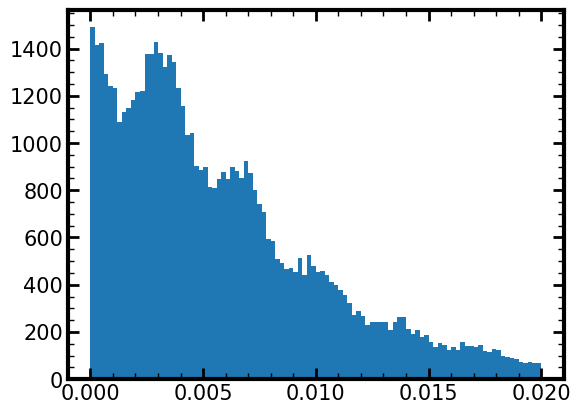

In [16]:
dataCal, sigma = data_calibrated_NSAMP(active_area = true_active_area, gain = Gain, ratio_keV = ratio_keV, unidades = 2, sigma_ADUs = sig_ADUs)
print('Sigma: ', sigma, ' keV')

plt.hist(dataCal.flatten(), bins = 100, range = (0, 0.02))
plt.show()

### Pruebas de clusterización

In [17]:
list_numbers = [10]
for element in list_numbers:
    num = element / 2
    list_numbers.append(num)
    # print(num)
    if num < 1:
        print('Finished')
        break
print(list_numbers)


Finished
[10, 5.0, 2.5, 1.25, 0.625]


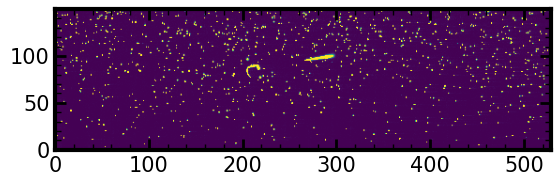

In [17]:
copy_dataCal = dataCal.copy()
plt.imshow(copy_dataCal, vmax=1, vmin=0)

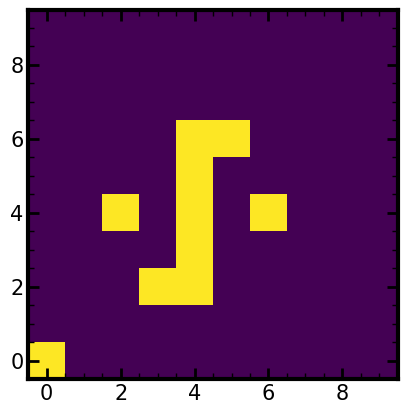

In [17]:
example = np.zeros((10, 10))
example[0][0] = 2
example[2][3] = 2
example[2][4] = 2
example[4][2] = 2
example[3][4] = 2
example[5][4] = 2
example[6][4] = 2
example[6][5] = 2

example[4][4] = 2

example[4][6] = 2
plt.imshow(example)

In [18]:
dataCal = example
xshape = dataCal.shape[1]
yshape = dataCal.shape[0]


neg_px = 0
null_px = 0
n_seeds = 0
list_clusters = []

copy_dataCal = dataCal.copy()

# plt.imshow(data_zeros)
# plt.show()

seed_charge = 15 * sigma
skirts_charge =  5 * sigma

n_clusters = 0
for pix_Y in range(0, yshape):
    for pix_X in range(0, xshape):
        px_charge = copy_dataCal[pix_Y][pix_X]

        if px_charge > seed_charge:
            # print('Seed founded')
            data_zeros = np.zeros((yshape, xshape), dtype=bool)
            n_seeds += 1
            set_neighbor = set()

            neighbor_matrix = [(pix_X-1, pix_Y+1), (pix_X, pix_Y+1), (pix_X+1, pix_Y+1),
                                (pix_X-1, pix_Y),   (pix_X, pix_Y),   (pix_X+1, pix_Y), 
                               (pix_X-1, pix_Y-1), (pix_X, pix_Y-1), (pix_X+1, pix_Y-1)]
                

            for px in neighbor_matrix:
                try:
                    if copy_dataCal[px[1]][px[0]] > skirts_charge:
                        # print(px)
                        # print('Added')
                        set_neighbor.add(px)
                    else:
                        continue
                except:
                    # print('Out of range')
                    continue

            copy_set = set_neighbor.copy()
            print('Org set: ', copy_set)

            set_size = len(copy_set)
            flag_loop = True
            ncomp = 0
            aux_set = set()

            while flag_loop:
                ncomp += 1
                print('In loop', ncomp, set_size)
                other_set = set()
                print(len(copy_set))

                for coord_px in copy_set:
                    # print(coord_px)
                    other_set.add(coord_px)
                    neighbor_matrix = [(coord_px[0]-1, coord_px[1]+1), (coord_px[0], coord_px[1]+1), (coord_px[0]+1, coord_px[1]+1),
                                        (coord_px[0]-1, coord_px[1]),     (coord_px[0], coord_px[1]),    (coord_px[0]+1, coord_px[1]), 
                                        (coord_px[0]-1, coord_px[1]-1),  (coord_px[0], coord_px[1]-1),  (coord_px[0]+1, coord_px[1]-1)]
                    
                    for px in neighbor_matrix:
                        try:
                            if copy_dataCal[px[1]][px[0]] > skirts_charge:
                                copy_dataCal[px[1]][px[0]] = 0
                                set_neighbor.add(px)
                                aux_set.add(px)

                                # if px in set_neighbor:
                                #     continue
                                # else:
                                #     aux_set.add(px)
                        except:
                            # print('Flag 2 Up')
                            continue
                    
                # copy_set = set_neighbor.copy()
                print('copyset: ', copy_set)
                print('otherset: ', other_set)
                print('auxset: ', aux_set)

                for element in copy_set:
                    if element in other_set:
                        # print(element)
                        aux_set.remove(element)


                copy_set = aux_set.copy()
                print('aft remove: ', copy_set)

                set_size = len(set_neighbor)

                if ncomp == set_size:
                    flag_loop = False
            
            print('Out of loop')
            for coord_px in set_neighbor:
                data_zeros[coord_px[1]][coord_px[0]] = bool(1)

            data_zeros = nd.binary_dilation(data_zeros, structure=[[1,1,1],[1,1,1],[1,1,1]])
            
            # plt.imshow(data_zeros)
            # plt.show()
            list_clusters.append(data_zeros)

            copy_dataCal = ma.masked_array(copy_dataCal, mask=data_zeros)
            
            if n_seeds > 10:
                break
        
        else:
            continue



            # print('Seed found')
print(neg_px, null_px, n_seeds)

Org set:  {(0, 0)}
In loop 1 1
1
copyset:  {(0, 0)}
otherset:  {(0, 0)}
auxset:  {(0, 0)}
aft remove:  set()
Out of loop
Org set:  {(3, 2), (4, 2), (4, 3)}
In loop 1 3
3
copyset:  {(3, 2), (4, 2), (4, 3)}
otherset:  {(3, 2), (4, 2), (4, 3)}
auxset:  {(4, 4), (3, 2), (4, 2), (4, 3)}
aft remove:  {(4, 4)}
In loop 2 4
1
copyset:  {(4, 4)}
otherset:  {(4, 4)}
auxset:  {(4, 4), (4, 5)}
aft remove:  {(4, 5)}
In loop 3 5
1
copyset:  {(4, 5)}
otherset:  {(4, 5)}
auxset:  {(4, 5), (5, 6), (4, 6)}
aft remove:  {(4, 6), (5, 6)}
In loop 4 7
2
copyset:  {(4, 6), (5, 6)}
otherset:  {(4, 6), (5, 6)}
auxset:  {(5, 6), (4, 6)}
aft remove:  set()
In loop 5 7
0
copyset:  set()
otherset:  set()
auxset:  set()
aft remove:  set()
In loop 6 7
0
copyset:  set()
otherset:  set()
auxset:  set()
aft remove:  set()
In loop 7 7
0
copyset:  set()
otherset:  set()
auxset:  set()
aft remove:  set()
Out of loop
Org set:  {(2, 4)}
In loop 1 1
1
copyset:  {(2, 4)}
otherset:  {(2, 4)}
auxset:  {(2, 4)}
aft remove:  set()

0


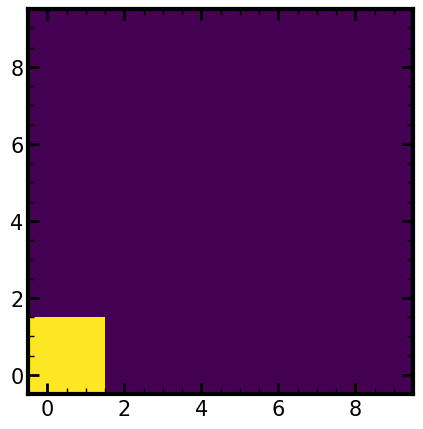

1


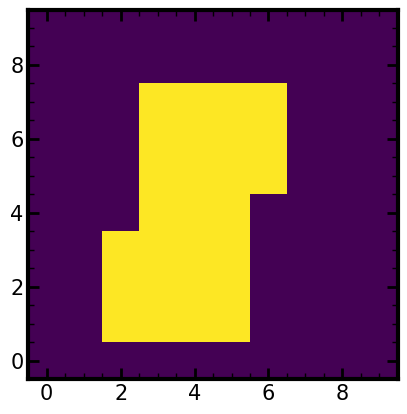

2


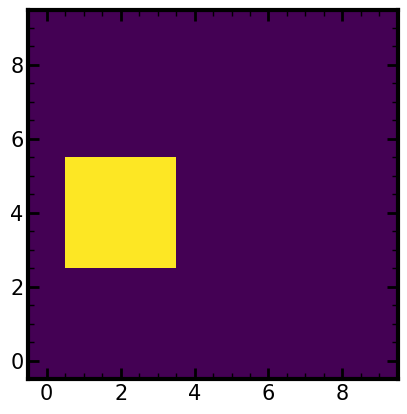

3


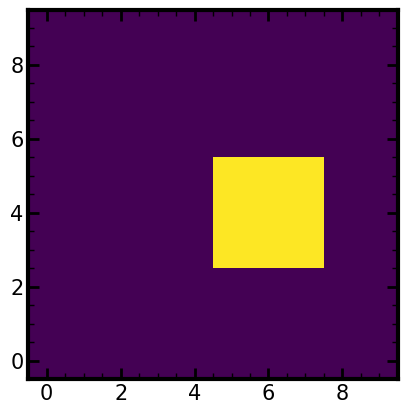

4


IndexError: list index out of range

In [19]:
fig, axs = plt.subplots(1,1, figsize = [5,5])
for index in range(0, 10):
# for index in range(0, len(list_clusters)):
    # axs.imshow(list_clusters[index])
    print(index)
    plt.imshow(list_clusters[index])
    # plt.imshow(list_clusters[index+1])
    # plt.imshow(list_clusters[index+2])
    # plt.imshow(list_clusters[index+3])
    plt.show()
# plt.show()

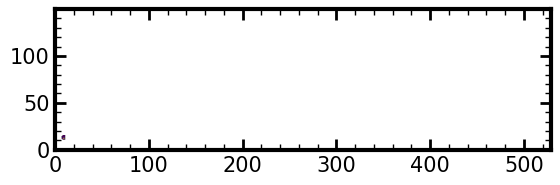

Coord. x of the matrix:  (7, 10)
Coord. y of the matrix:  (11, 15)
charge:  5.4157896


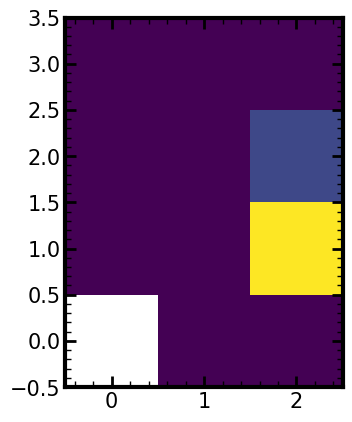

In [71]:
sample_mask = list_clusters[19]
inv_mask = np.invert(sample_mask)

datamask = ma.masked_array(dataCal, inv_mask)
plt.imshow(datamask)
plt.show()

list_pxx = []
list_pxy = []
for pxy in range(0, datamask.shape[0]):
    for pxx in range(0, datamask.shape[1]):
        if datamask[pxy][pxx]:
            # print(datamask[pxy][pxx], (pxx, pxy))
            list_pxx.append(pxx)
            list_pxy.append(pxy)

refmin_pxx = list_pxx[0]
refmax_pxx = list_pxx[0]
for index in range(1, len(list_pxx)):
    if list_pxx[index]<refmin_pxx:
        refmin_pxx = list_pxx[index]
        index_min = index
    
    if list_pxx[index] > refmax_pxx:
        refmax_pxx = list_pxx[index]
        index_max = index

refmin_pxy = list_pxy[0]
refmax_pxy = list_pxy[0]
for index in range(1, len(list_pxy)):
    if list_pxy[index]<refmin_pxy:
        refmin_pxy = list_pxy[index]
        index_miny = index
    
    if list_pxy[index] > refmax_pxy:
        refmax_pxy = list_pxy[index]
        index_maxy = index

print('Coord. x of the matrix: ', (refmin_pxx, refmax_pxx))
print('Coord. y of the matrix: ', (refmin_pxy, refmax_pxy))
iso_cluster = datamask[refmin_pxy:refmax_pxy, refmin_pxx:refmax_pxx]
charge = iso_cluster.sum()

plt.imshow(iso_cluster)
print('charge: ', charge)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121


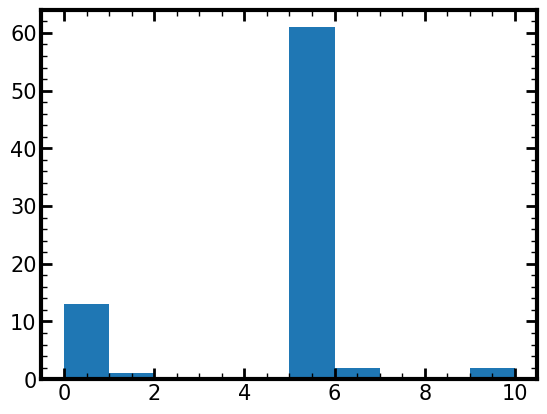

In [76]:
list_charge = []
for index in range(0, len(list_clusters)):
    print(index)
    sample_mask = list_clusters[index]
    inv_mask = np.invert(sample_mask)

    datamask = ma.masked_array(dataCal, inv_mask)
    # plt.imshow(datamask)
    # plt.show()

    # list_pxx = []
    # list_pxy = []
    # for pxy in range(0, datamask.shape[0]):
    #     for pxx in range(0, datamask.shape[1]):
    #         if datamask[pxy][pxx]:
    #             # print(datamask[pxy][pxx], (pxx, pxy))
    #             list_pxx.append(pxx)
    #             list_pxy.append(pxy)

    # refmin_pxx = list_pxx[0]
    # refmax_pxx = list_pxx[0]
    # for index in range(1, len(list_pxx)):
    #     if list_pxx[index]<refmin_pxx:
    #         refmin_pxx = list_pxx[index]
    #         index_min = index
        
    #     if list_pxx[index] > refmax_pxx:
    #         refmax_pxx = list_pxx[index]
    #         index_max = index

    # refmin_pxy = list_pxy[0]
    # refmax_pxy = list_pxy[0]
    # for index in range(1, len(list_pxy)):
    #     if list_pxy[index]<refmin_pxy:
    #         refmin_pxy = list_pxy[index]
    #         index_miny = index
        
    #     if list_pxy[index] > refmax_pxy:
    #         refmax_pxy = list_pxy[index]
    #         index_maxy = index

    # print('Coord. x of the matrix: ', (refmin_pxx, refmax_pxx))
    # print('Coord. y of the matrix: ', (refmin_pxy, refmax_pxy))
    # iso_cluster = datamask[refmin_pxy:refmax_pxy, refmin_pxx:refmax_pxx]
    iso_cluster = datamask
    charge = iso_cluster.sum()
    list_charge.append(charge)
    # plt.imshow(iso_cluster)
    # print('charge: ', charge)

plt.hist(list_charge, range=(0, 10))
plt.show()